In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/the-ultimate-earthquake-dataset-from-1990-2023/Eartquakes-1990-2023.csv


In [2]:
ks = pd.read_csv("/kaggle/input/the-ultimate-earthquake-dataset-from-1990-2023/Eartquakes-1990-2023.csv")


In [3]:
ks.shape

(3445751, 12)

In [4]:
ks.head(5)

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00


In [5]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.5+ MB


In [6]:
#checking the data types
ks.dtypes

time              int64
place            object
status           object
tsunami           int64
significance      int64
data_type        object
magnitudo       float64
state            object
longitude       float64
latitude        float64
depth           float64
date             object
dtype: object

In [7]:
ks.describe()

,time,tsunami,significance,magnitudo,longitude,latitude,depth
count,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06,3.445751e+06
mean,1.247124e+12,4.434447e-04,7.400973e+01,1.774076e+00,-1.012876e+02,3.746483e+01,2.285387e+01
std,2.976292e+11,2.105346e-02,1.016364e+02,1.291055e+00,7.697416e+01,2.041577e+01,5.484938e+01
min,6.311534e+11,0.000000e+00,0.000000e+00,-9.990000e+00,-1.799997e+02,-8.442200e+01,-1.000000e+01
25%,1.024401e+12,0.000000e+00,1.300000e+01,9.100000e-01,-1.464274e+02,3.406400e+01,3.120000e+00
50%,1.282338e+12,0.000000e+00,3.300000e+01,1.460000e+00,-1.189538e+02,3.793567e+01,7.700000e+00
75%,1.508701e+12,0.000000e+00,8.100000e+01,2.300000e+00,-1.159277e+02,4.784800e+01,1.612000e+01
max,1.690629e+12,1.000000e+00,2.910000e+03,9.100000e+00,1.800000e+02,8.738600e+01,7.358000e+02


In [8]:
#checking the null values
pd.isnull(ks).sum()

time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       0
latitude        0
depth           0
date            0
dtype: int64

In [9]:
ks.dropna(inplace=True)

In [10]:
ks.columns

Index(['time', 'place', 'status', 'tsunami', 'significance', 'data_type',
       'magnitudo', 'state', 'longitude', 'latitude', 'depth', 'date'],
      dtype='object')

In [11]:
#cheking the duplicate values
ks.duplicated().sum()

16869

In [12]:
#checking unique values
ks.nunique()



time            3428775
place            531130
status                6
tsunami               2
significance       1170
data_type            25
magnitudo           933
state               858
longitude        733599
latitude         518295
depth             78386
date            3428775
dtype: int64

**Problems 

1.Draw a pie chart of current state of event(automatic or reviewed)**

([<matplotlib.patches.Wedge at 0x7df78aea4cd0>,
 [Text(-1.077760798971768, 0.22007194323615378, 'reviewed'),
  Text(1.074605028592331, -0.23499794153157044, 'automatic'),
  Text(1.099878071594367, -0.01637765629925545, 'AUTOMATIC'),
  Text(1.099999415324402, -0.0011341454819219958, 'REVIEWED'),
  Text(1.0999999998849483, -1.5909554125562797e-05, 'MANUAL'),
  Text(1.0999999999931758, -3.87472596922784e-06, 'manual')],
 [Text(-0.5878695267118733, 0.12003924176517478, '93.6%'),
  Text(0.5861481974139987, -0.1281806953808566, '6.0%'),
  Text(0.5999334935969274, -0.008933267072321154, '0.4%'),
  Text(0.5999996810860373, -0.0006186248083210886, '0.0%'),
  Text(0.5999999999372444, -8.677938613943342e-06, '0.0%'),
  Text(0.5999999999962776, -2.1134868923060945e-06, '0.0%')])

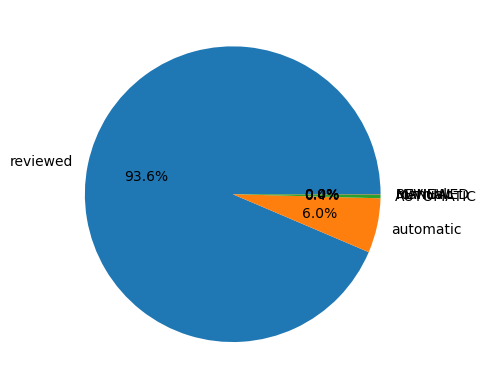

In [13]:
plt.pie(ks['status'].value_counts(),labels=list(ks['status'].unique()),autopct="%0.1f%%")

As we can see reviewed state is more than automatic state

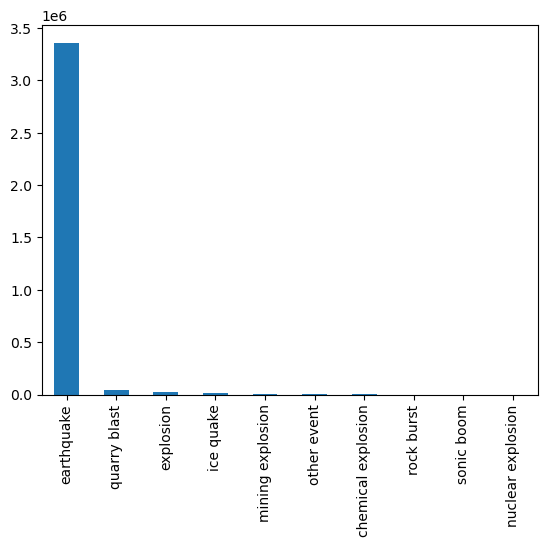

In [14]:
ks['data_type'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar')
plt.show()

3.Relation between magnitude and significance

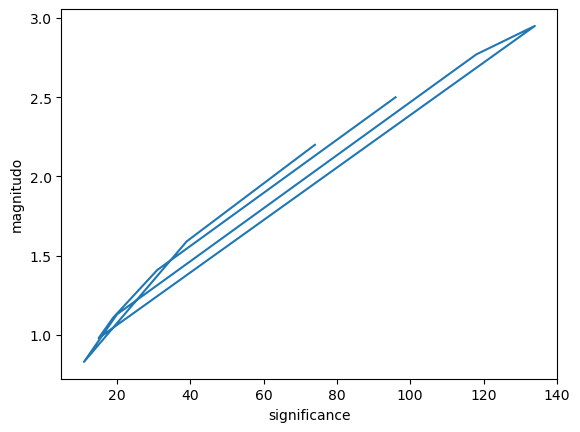

In [15]:
#The precalcualted average of magnitude is 83.02686789
#The precalculated average of significance is 1.972216904
#Here we have plot the values which are less than and eqaual to average values
y= ks['magnitudo'][:10]

x = ks['significance'][:10]

plt.xlabel("significance")
plt.ylabel("magnitudo")
plt.plot(x,y)

/tmp/ipykernel_20/987589371.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ks['latitude'])


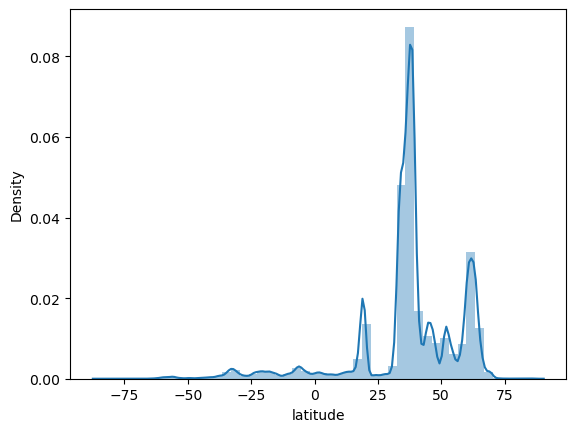

In [16]:
sns.distplot(ks['latitude'])
plt.show()

/tmp/ipykernel_20/1562912870.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ks['longitude'])


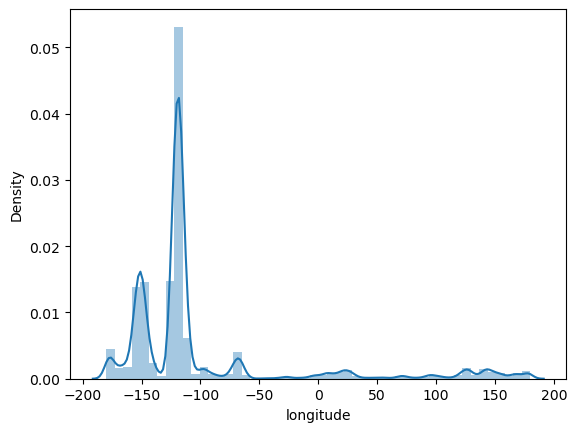

In [17]:
sns.distplot(ks['longitude'])
plt.show()